In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre Processing

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<Axes: xlabel='Glucose', ylabel='Insulin'>

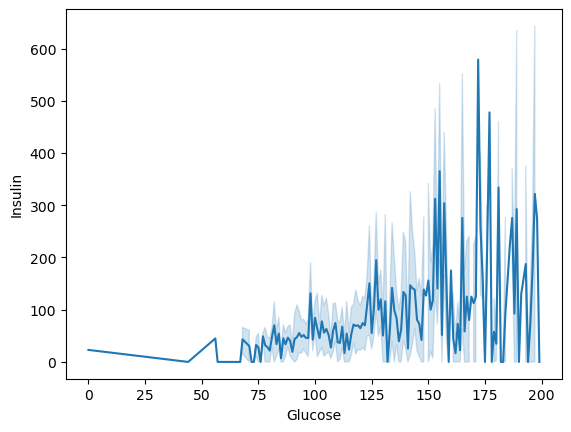

In [43]:
sns.lineplot(x='Glucose',y='Insulin',data=data)

In [44]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131129,0.140131,-0.082364,-0.074364,0.015465,-0.035461,0.543072,0.219507
Glucose,0.131129,1.000000,0.155498,0.074562,0.330665,0.236013,0.138516,0.269595,0.493188
BloodPressure,0.140131,0.155498,1.000000,0.207572,0.088550,0.280536,0.040245,0.238515,0.063336
SkinThickness,-0.082364,0.074562,0.207572,1.000000,0.440806,0.391487,0.183827,-0.114682,0.072385
Insulin,-0.074364,0.330665,0.088550,0.440806,1.000000,0.199499,0.184738,-0.043130,0.132278
BMI,0.015465,0.236013,0.280536,0.391487,0.199499,1.000000,0.139547,0.033969,0.289660
DiabetesPedigreeFunction,-0.035461,0.138516,0.040245,0.183827,0.184738,0.139547,1.000000,0.031582,0.172701
Age,0.543072,0.269595,0.238515,-0.114682,-0.043130,0.033969,0.031582,1.000000,0.235894
Outcome,0.219507,0.493188,0.063336,0.072385,0.132278,0.289660,0.172701,0.235894,1.000000


<Axes: >

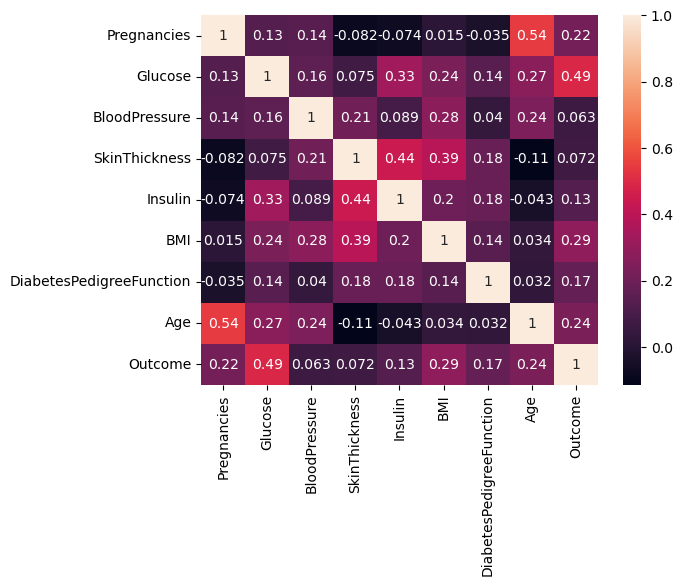

In [45]:
sns.heatmap(data.corr(),annot=True)

fgfhgfhgfghjhg

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


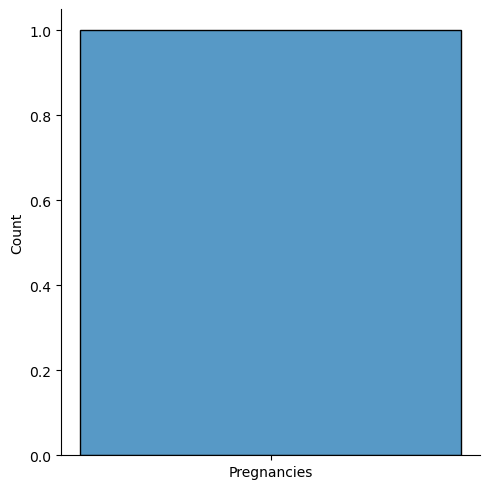

In [46]:
sns.displot('Pregnancies')

In [47]:
#pandas profiling for online EDA

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


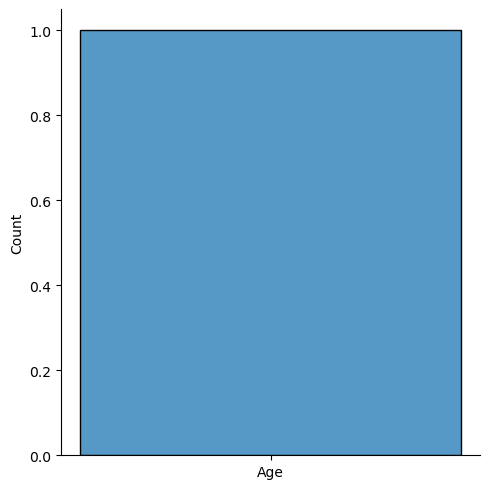

In [48]:
sns.displot('Age')

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


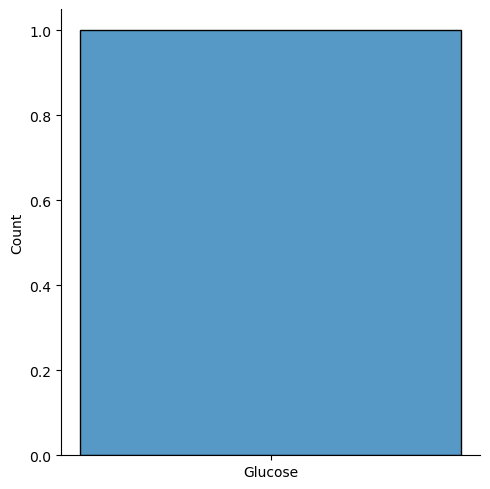

In [49]:
sns.displot('Glucose')

<Axes: xlabel='Pregnancies', ylabel='Age'>

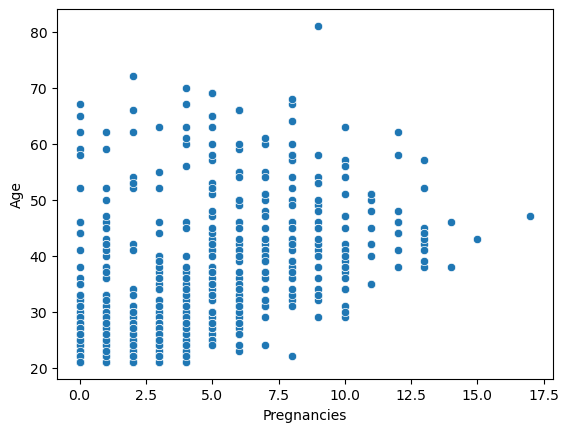

In [50]:
sns.scatterplot(x='Pregnancies',y='Age',data=data)

In [51]:
data.duplicated().sum()

0

<Axes: xlabel='Glucose', ylabel='Insulin'>

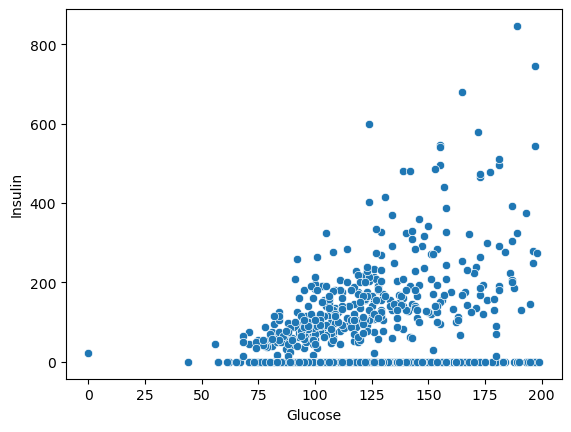

In [52]:
sns.scatterplot(x='Glucose',y='Insulin',data=data)

In [53]:
data=data[data['Glucose'] | data['Insulin']!=0]

<Axes: xlabel='Glucose', ylabel='Insulin'>

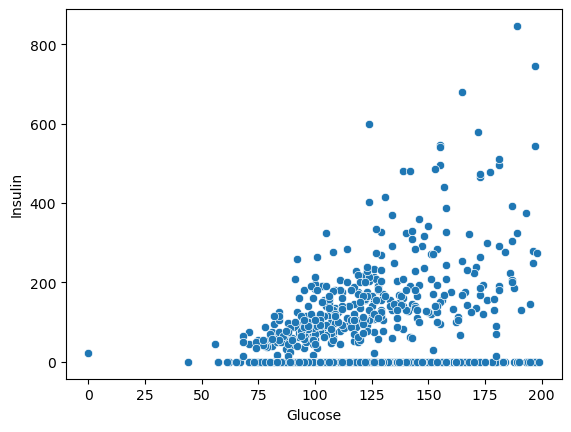

In [54]:
sns.scatterplot(x='Glucose',y='Insulin',data=data)

# Data Split

In [55]:
target=data['Outcome']
inputs=data.drop('Outcome',axis=1)
inputs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [57]:
scaler.fit(inputs)

StandardScaler()

In [58]:
scaled_inputs=scaler.transform(inputs)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,target,test_size=0.2,random_state=42)

# Model1:LR

In [60]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [61]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [62]:
log_reg.score(x_train,y_train)

0.7643207855973814

In [63]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [64]:
y_pred=log_reg.predict(x_test)

In [65]:
cm=confusion_matrix(y_test,y_pred)

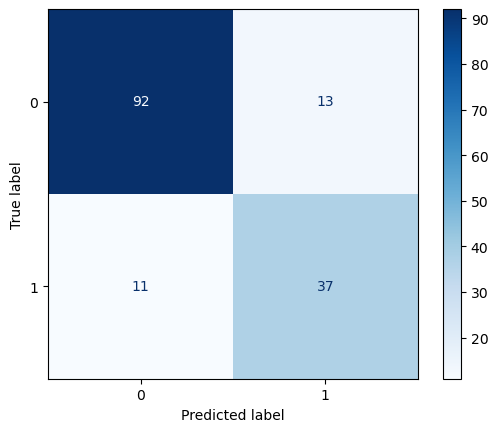

In [66]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [67]:
from sklearn import metrics

In [68]:
metrics.mean_squared_error(y_test,y_pred)


0.1568627450980392

In [69]:
metrics.explained_variance_score(y_test,y_pred)

0.27222222222222203

In [70]:
metrics.mean_absolute_error(y_test,y_pred)

0.1568627450980392

In [71]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred))

0.3960590171906697

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


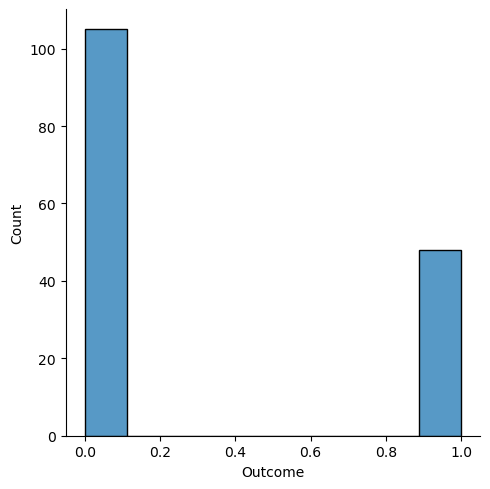

In [72]:
sns.displot(y_test)

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


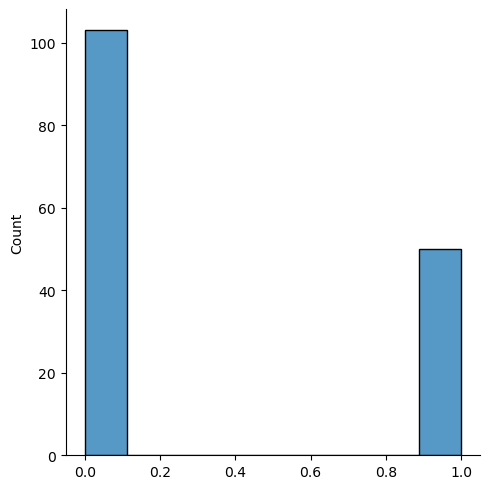

In [73]:
sns.displot(y_pred)

In [74]:
log_reg.score(x_train,y_train)

0.7643207855973814

In [75]:
log_reg.score(x_test,y_test)

0.8431372549019608

In [76]:
accuracy_score(y_test,y_pred)

0.8431372549019608

# Train KNN Model

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [78]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
y_pred=knn.predict(x_test)

In [80]:
cm=confusion_matrix(y_test,y_pred)

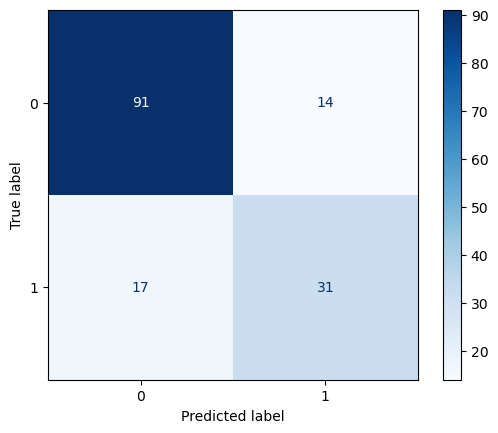

In [81]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [82]:
metrics.mean_squared_error(y_test,y_pred)

0.20261437908496732

In [83]:
metrics.mean_absolute_error(y_test,y_pred)

0.20261437908496732

In [84]:
metrics.explained_variance_score(y_test,y_pred)

0.06071428571428583

In [85]:
knn.score(x_train,y_train)

0.8216039279869067

In [86]:
knn.score(x_test,y_test)

0.7973856209150327

In [87]:
accuracy_score(y_test,y_pred)

0.7973856209150327

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


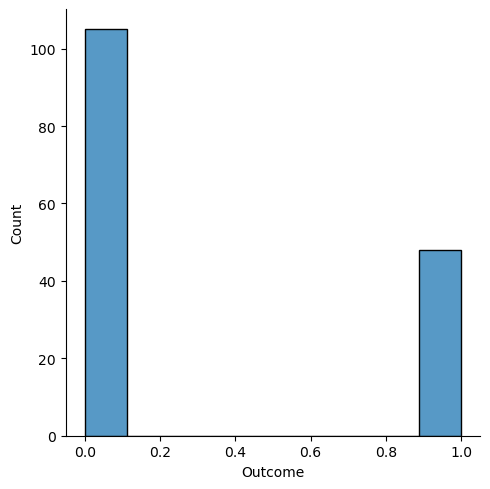

In [88]:
sns.displot(y_test)

C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


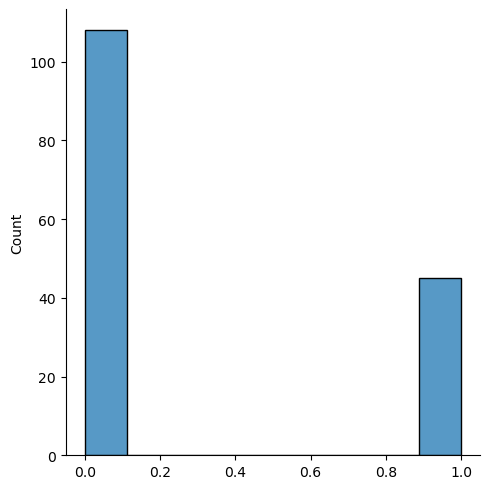

In [89]:
sns.displot(y_pred)

# Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [91]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
y_pred=dt.predict(x_test)

In [105]:
m=confusion_matrix(y_test,y_pred)

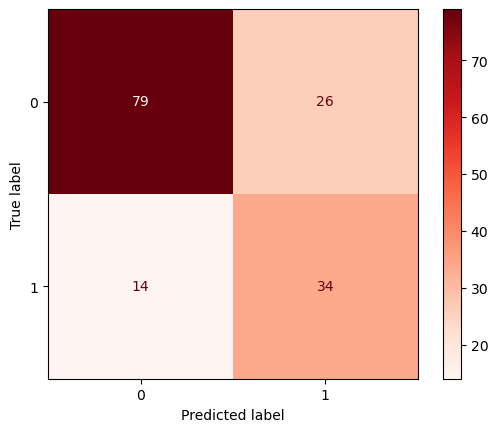

In [106]:
disp=ConfusionMatrixDisplay(confusion_matrix=m)
disp.plot(cmap=plt.cm.Reds)

In [107]:
accuracy_score(y_test,y_pred)

0.738562091503268

In [108]:
dt.score(x_test,y_test)

0.738562091503268

# Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

In [110]:
gm=GaussianNB()
gm.fit(x_train,y_train)

GaussianNB()

In [111]:
y_pred=gm.predict(x_test)

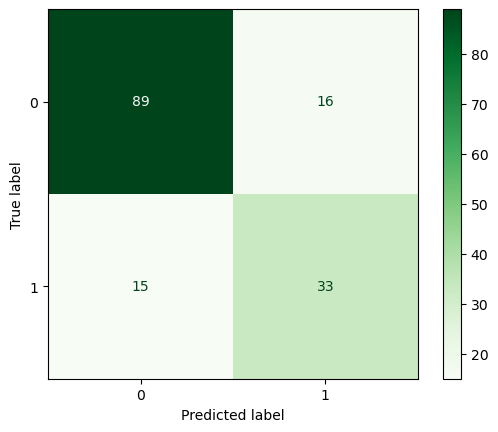

In [112]:
m=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=m)
disp.plot(cmap=plt.cm.Greens)

In [113]:
gm.score(x_test,y_test)

0.7973856209150327

In [114]:
accuracy_score(y_test,y_pred)

0.7973856209150327

# from this the more accurate model is the Logistic Regression